In [124]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

### Step 1: Import the dataset
- Import breast cancer dataset using `from sklearn.datasets import load_breast_cancer`
- Check the shape of the dataset and the feature names

In [125]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X.shape

(569, 30)

In [126]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Step 2: PCA
- Instintiate PCA for 2 components
- Fit and transform the data set
- Create a scatter plot of the two components

In [127]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

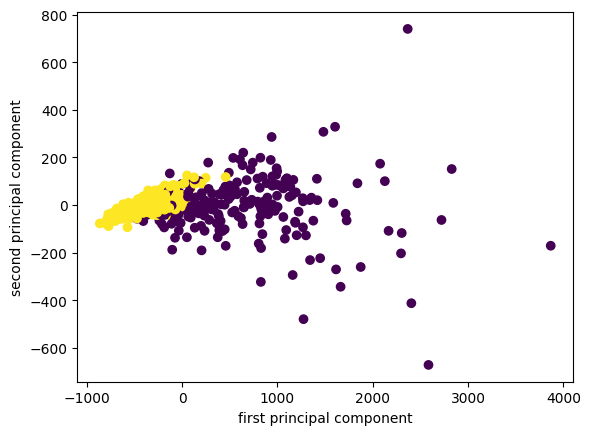

In [128]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('first principal component')
plt.ylabel('second principal component');

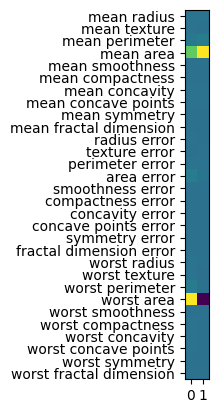

In [129]:
plt.imshow(pca.components_.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar;

### Step 3: PCA with scaling
- Repeat Step 2 after you scale the dataset. You may create a pipeline of a scaler and a PCA.

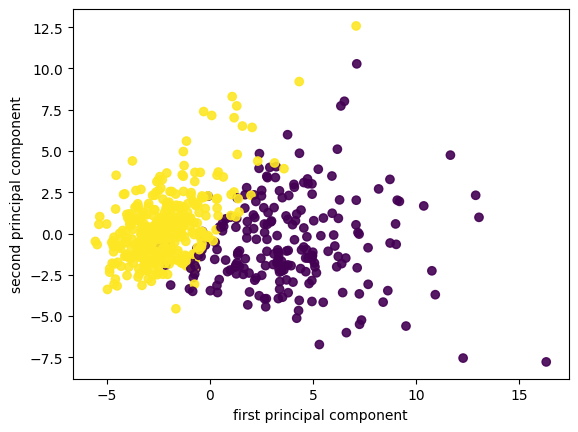

In [130]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(X)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=0.9)
plt.xlabel('first principal component')
plt.ylabel('second principal component');

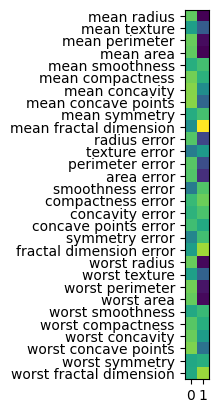

In [131]:
plt.imshow(pca_scaled.named_steps['pca'].components_.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar;

### Step 4: PCA and LogisticRegression
- Split the dataset into train and test datasets
- Instintiate a logistic regression model, fit on the train dataset and get the accuracy for both train and test datasets
- Create a pipeline of scaler, PCA, and logistic regression
- Report the score for the train and test datasets for the reduced model


In [132]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
lr = LogisticRegression(C=10000)
lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000)

In [134]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(C=10000))])

In [135]:
print("Logistic Regression Training accuracy:", lr.score(X_train, y_train))
print("Logistic Regression Testing accuracy:", lr.score(X_test, y_test))
print("PCA LR Training accuracy:", pca_lr.score(X_train, y_train))
print("PCA LR Testing accuracy:", pca_lr.score(X_test, y_test))

Logistic Regression Training accuracy: 0.9626373626373627
Logistic Regression Testing accuracy: 0.956140350877193
PCA LR Training accuracy: 0.9494505494505494
PCA LR Testing accuracy: 0.9912280701754386


### Step 5: Plot PCA components
- Create a pipeline of a standard scaler and PCA
- fit the pipeline on the train dataset
- Plot the PCA's explained variance ratio for each additional component

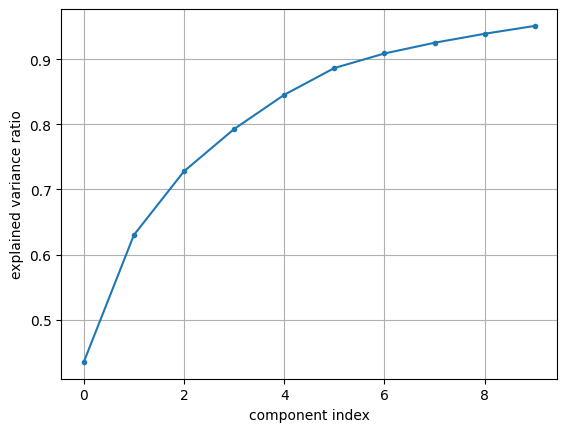

In [136]:
pca = make_pipeline(StandardScaler(), PCA(n_components=10))
pca.fit(X_train, y_train)
plt.plot(np.cumsum(pca.named_steps['pca'].explained_variance_ratio_), marker='.')
plt.xlabel('component index')
plt.ylabel('explained variance ratio')
plt.grid(True)

### Step 6: PCA and Logistic Regression -again
- Create a pipeline of a scaler, PCA with the best number of components from Step-5, and a logistic regressor
- Fit the pipeline on the train dataset and report both the train and the test data set scores
- Fit a scaled logistic regression withut PCa
- Compare the coefficients you obtain from inverse PCA and the coefficients you receive without PCA

In [137]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(C=10000))
pca_lr.fit(X_train,y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9802197802197802
0.9824561403508771


In [138]:
pca = pca_lr.named_steps['pca']
lr = pca_lr.named_steps['logisticregression']
coef_pca = pca.inverse_transform(lr.coef_)
coef_pca

array([[-0.518, -1.288, -0.518, -0.681, -0.65 , -0.018, -0.785, -0.658,
         0.261,  0.951, -1.467,  0.732, -1.437, -1.668, -0.162,  0.619,
        -0.251, -0.01 ,  0.036,  1.681, -0.897, -1.42 , -0.91 , -1.011,
        -1.563, -0.58 , -1.2  , -1.06 , -0.96 ,  0.276]])

In [139]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=10000))
lr_pipe.fit(X_train,y_train)
lr_pipe.named_steps['logisticregression'].coef_

array([[  3.29 ,  -4.966,  11.104,   1.951,   2.691,  69.016, -30.313,
        -60.441,  10.419, -37.571, -65.935,   8.639,  25.761, -40.854,
        -13.774, -20.698,  50.233, -20.679,  22.163,  31.071, -25.237,
        -23.51 ,  17.945, -25.272,  16.637,   8.492, -58.572,  -6.736,
        -40.827,  12.656]])

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

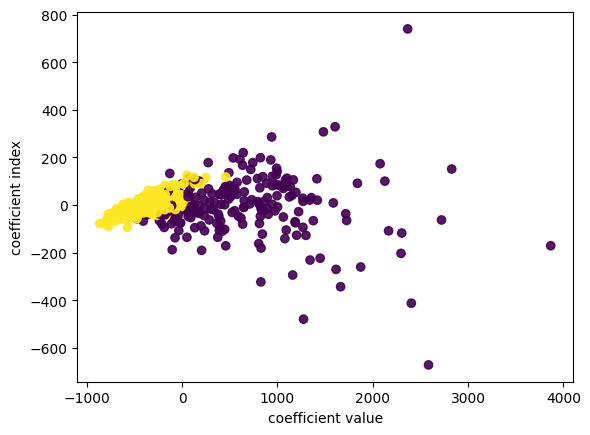

In [140]:
X_scaled = pca.fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, alpha=0.9)
plt.xlabel('coefficient value')
plt.ylabel('coefficient index')

X_scaled = lr_pipe.fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, alpha=0.9)
